/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting training...
Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9015 - loss: 0.2921 - val_accuracy: 0.9571 - val_loss: 0.1355
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9582 - loss: 0.1346 - val_accuracy: 0.9533 - val_loss: 0.1438
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9613 - loss: 0.1218 - val_accuracy: 0.9648 - val_loss: 0.1198
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9644 - loss: 0.1156 - val_accuracy: 0.9681 - val_loss: 0.1081
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9660 - loss: 0.1123 - val_accuracy: 0.9679 - val_loss: 0.1081
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9666 - loss: 0.1082 - val_accuracy: 0.9683 - val_loss: 0.1064
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9662 - loss: 0.1079 - val_accuracy: 0.9687 - val_loss: 0.1048
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.

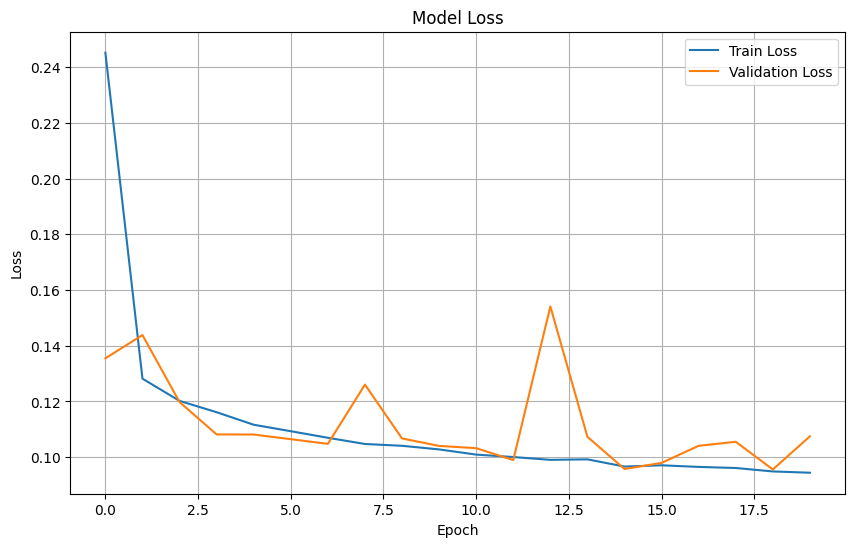

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/star_classification.csv')

# Encode class labels
df['class'] = df['class'].map({'GALAXY': 0, 'STAR': 1, 'QSO': 2})

# Drop unnecessary columns
df = df.drop(['obj_ID', 'run_ID', 'rerun_ID', 'fiber_ID', 'spec_obj_ID', 'field_ID', 'cam_col'], axis=1)

# Split into features and target
features = df.columns[df.columns != 'class']
X = df[features]
y = df['class']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert target to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

# Define the ANN model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),  # Added an additional hidden layer
    Dense(3, activation='softmax')  # Output layer with softmax for 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
print('Starting training...')
history = model.fit(X_train,
                    y_train_one_hot,
                    validation_data=(X_test, y_test_one_hot),
                    epochs=20,  # Increased number of epochs for better training
                    batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('/content/model_loss_plot.png')

# Display the plot
plt.show()